# LeNet Lab Solution
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the MNIST data
You do not need to modify this section.

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import KFold

In [7]:
dataset=mnist.load_data()   
(X_train,Y_train),(X_test,Y_test)=dataset
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)   #[None,width,height,channels]
Y_train=to_categorical(Y_train,num_classes=10)
Y_test=to_categorical(Y_test,num_classes=10)  #这里是将数字转换为one-hot编码

The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

You do not need to modify this section.

## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


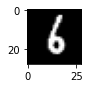

In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(Y_train[index])

## SOLUTION


In [9]:
def LeNet(X_train,Y_train):
    model=Sequential()
    model.add(Conv2D(filters=5,kernel_size=(3,3),strides=(1,1),input_shape=X_train.shape[1:],padding='same',
                     data_format='channels_last',activation='relu',kernel_initializer='uniform'))  #[None,28,28,5]
    model.add(Dropout(0.2))
    model.add(MaxPooling2D((2,2)))  #池化核大小[None,14,14,5]

    model.add(Conv2D(16,(3,3),strides=(1,1),data_format='channels_last',padding='same',activation='relu',kernel_initializer='uniform'))#[None,12,12,16]
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(2,2))  #output_shape=[None,6,6,16]

    model.add(Conv2D(32, (3, 3), strides=(1, 1), data_format='channels_last', padding='same', activation='relu',
                     kernel_initializer='uniform'))   #[None,4,4,32]
    model.add(Dropout(0.2))
    # model.add(MaxPooling2D(2, 2))
    #model.add(Conv2D(100,(3,3),strides=(1,1),data_format='channels_last',activation='relu',kernel_initializer='uniform'))  #[None,2,2,100]
    model.add(Flatten(data_format='channels_last'))  #[None,400]
    model.add(Dense(168,activation='relu'))   #[None,168]
    model.add(Dense(84,activation='relu'))    #[None,84]
    model.add(Dense(10,activation='softmax'))  #[None,10]
    #打印参数
    model.summary()
    #编译模型
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

    return model


## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [10]:
if __name__=="__main__":
#模型训练
    model=LeNet(X_train,Y_train)
    model.fit(x=X_train,y=Y_train,batch_size=128,epochs=10)
    #模型评估
    loss,acc=model.evaluate(x=X_test,y=Y_test)
    print("loss:{}===acc:{}".format(loss,acc))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 5)         50        
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 28, 5)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 5)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        736       
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 32)         